## 1. Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as smf


## 2. Data Understanding

In [2]:
df = pd.read_csv('USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


#### Reading the shape of data

In [3]:
df.shape

(5000, 7)

#### Droping the Unnecessary Columns

In [4]:
df.drop(columns = 'Address', inplace = True)

#### Renaming the column names 

In [5]:
df.rename(columns = {'Avg. Area Income': 'Avg_Area_Income','Avg. Area House Age':'Avg_Area_House_Age', 'Avg. Area Number of Rooms':'Avg_Area_Number_of_Rooms', 'Avg. Area Number of Bedrooms':'Avg_Area_Number_of_Bedrooms','Area Population':'Area_Population'}, inplace = True)

**Inferences from Descriptive Analysis**

1. All the Data Types are in float,

2. Mean and median are close to each other indicating its a normal distribution and hence no ouliers and

3. There are no null values and duplicated in the data.



## 3. Descriptive Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Avg_Area_Income              5000 non-null   float64
 1   Avg_Area_House_Age           5000 non-null   float64
 2   Avg_Area_Number_of_Rooms     5000 non-null   float64
 3   Avg_Area_Number_of_Bedrooms  5000 non-null   float64
 4   Area_Population              5000 non-null   float64
 5   Price                        5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [7]:
df.describe()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## 3.1 Data Visualisation

<Axes: xlabel='Price'>

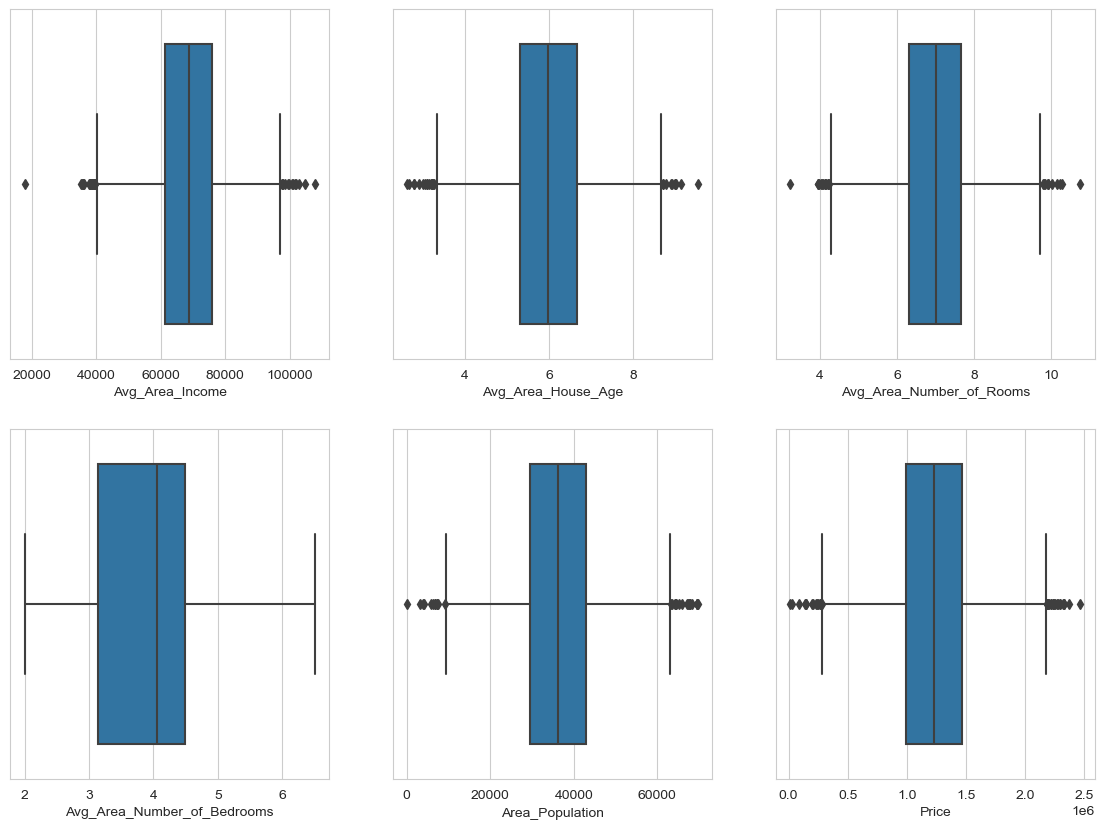

In [8]:
# Setting up the plots
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')

# Plot 1 
plt.subplot(2,3,1)
sns.boxplot(x='Avg_Area_Income',data=df)

# Plot 2
plt.subplot(2,3,2)
sns.boxplot(x='Avg_Area_House_Age',data=df)

# Plot 3 
plt.subplot(2,3,3)
sns.boxplot(x='Avg_Area_Number_of_Rooms',data=df)

# Plot 4
plt.subplot(2,3,4)
sns.boxplot(x='Avg_Area_Number_of_Bedrooms',data=df)

# Plot 5
plt.subplot(2,3,5)
sns.boxplot(x='Area_Population',data=df)

# Plot 6 
plt.subplot(2,3,6)
sns.boxplot(x='Price',data=df)

In [9]:
df[df['Avg_Area_Income'] <30000] # seems to be an outlier

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
39,17796.63119,4.949557,6.713905,2.5,47162.183643,302355.835979


In [10]:
# Treatment of outlier by removing it
df = df[df['Avg_Area_Income'] >30000]

In [11]:
df.shape

(4999, 6)

<Axes: >

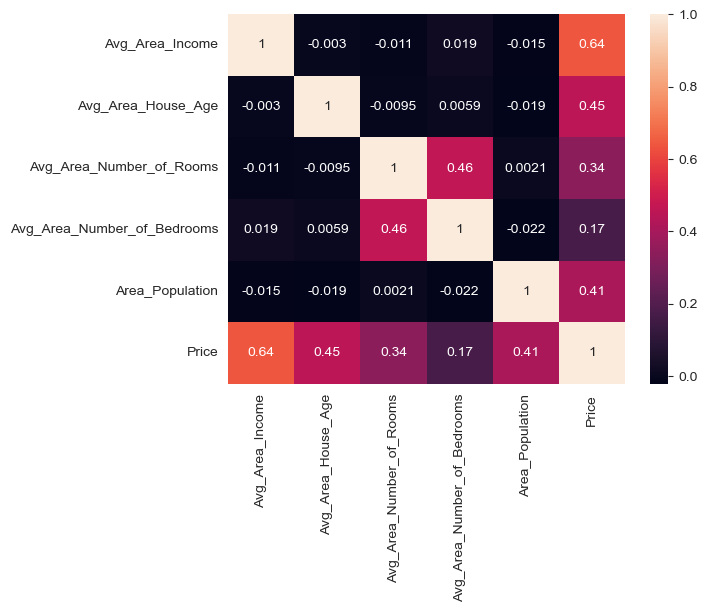

In [12]:
sns.heatmap(df.corr(),annot = True)

**Inferences from Univariate & Bivariate Analysis**

1. Treatment of outlier by removing it from Avg_Area_Income Column and

2. Price variable has a positive correlation with all the other influencing variables.

## 4. Linear Regression

### 4.1 Setting up the Predictive Variables and the Target Variable

In [13]:
X = df.drop(columns = 'Price')
y = df['Price']

In [14]:
X.shape

(4999, 5)

In [15]:
y.shape

(4999,)

### 4.2 Train Test Split

In [16]:
X_train, X_test, y_train,y_test = train_test_split(X, y,train_size = .7, random_state = 200)

In [17]:
X_train.shape

(3499, 5)

In [18]:
X_test.shape

(1500, 5)

### 4.3 Model Building

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
y_pred

array([1150713.78918697, 1265544.97639924, 1478565.37453276, ...,
        857951.46330083,  921543.40037158, 1004418.35577652])

In [23]:
y_pred.shape

(1500,)

In [24]:
lr.intercept_

-2661723.5984767424

In [25]:
lr.coef_

array([2.17352459e+01, 1.67237820e+05, 1.20038113e+05, 2.59201211e+03,
       1.52915814e+01])

## 5. Model Evaluation

### 5.1 Evaluation Using Sklearn Metrics

In [26]:
r2_score(y_test, y_pred)

0.9109934309306901

In [27]:
mean_squared_error(y_test, y_pred)

10644514731.358152

### 5.2 Evaluation Using Statsmodels

In [28]:
df.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

In [29]:
"+".join(df.columns)

'Avg_Area_Income+Avg_Area_House_Age+Avg_Area_Number_of_Rooms+Avg_Area_Number_of_Bedrooms+Area_Population+Price'

In [30]:
model1= smf.ols(formula = 'Price ~ Avg_Area_Income+Avg_Area_House_Age+Avg_Area_Number_of_Rooms+Avg_Area_Number_of_Bedrooms+Area_Population', data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:34:58   Log-Likelihood:                -64699.
No. Observations:                4999   AIC:                         1.294e+05
Df Residuals:                    4993   BIC:                         1.294e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [31]:
model2 =smf.ols(formula = 'Price ~ Avg_Area_Income+Avg_Area_House_Age+Avg_Area_Number_of_Rooms+Area_Population', data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.397e+04
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:34:58   Log-Likelihood:                -64700.
No. Observations:                4999   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.294e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               